Tập data MNIST gồm 70.000 ảnh grayscale 28x28 của các chữ viết tay của các số từ 0 đến 9.

In [12]:
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(trainX, trainy), (testX, testy) = load_data()

print(f"Train: X - {trainX.shape}, y - {trainy.shape}")
print(f"Test: X - {testX.shape}, y - {testy.shape}")

Train: X - (60000, 28, 28), y - (60000,)
Test: X - (10000, 28, 28), y - (10000,)


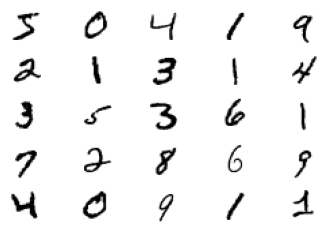

In [7]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis('off')
    plt.imshow(trainX[i], cmap='gray_r')
    
plt.show()

Trước tiên, chúng ta sẽ định nghĩa cho Discriminator model. Model này nhận input là một image và output là một classification để dự đoán một sample là fake hay real. Đây cũng là một bài toán binary classification.

Tóm lại:
  * **Inputs**: ảnh grayscale với kích thước 28x28.
  * **Outputs**: binary classification cho hai class fake và real.

Discriminator model có hai convolutional - mỗi cái như vậy chứa 64 filter, kernel-size là 3 và stride là 2. Model không chứa pooling layer và output layer chứa duy nhất một neuron sử dụng sigmoid activation function dùng để dự đoán fake hoặc real.

Model được đào tạo để tối thiểu hóa binary cross-entropy loss function. Ở đây thay vì sử dụng ReLU chúng ta sẽ sử dụng LeakyReLU, DropOut và tùy chỉnh Adam optimizer với learning rate là $0.0002$ và momentum là $0.5$. 

Mọi thứ bên trên sẽ được thiết lập bên trong hàm `define_discriminator()` được định nghĩa dưới đây.

In [10]:
def define_discriminator(in_shape=(28, 28, 1)):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    '''Compile'''
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

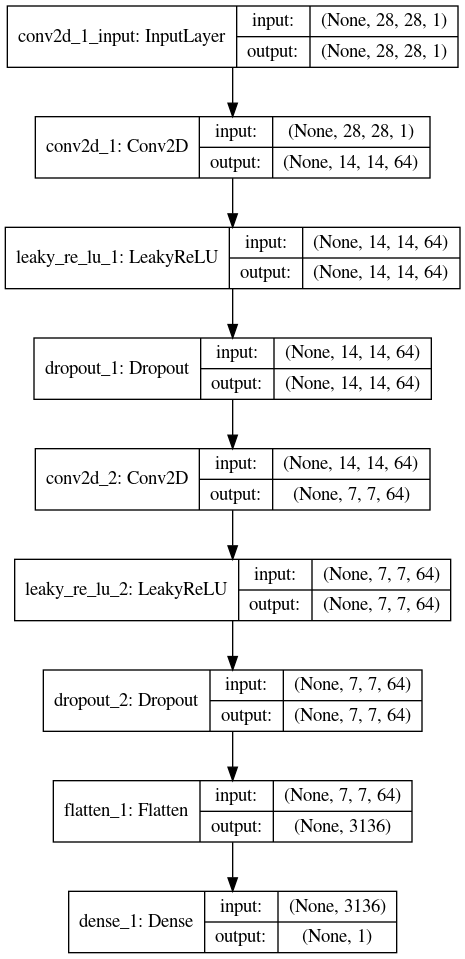

In [11]:
model = define_discriminator()
model.summary()
plot_model(model, to_file='./images/minist_discriminator_plot.png',
           show_shapes=True, show_layer_names=True)

Chúng ta có thể tiến hành train model Discriminator ngay bây giờ với các real sample được đánh nhạn là $1$ và chúng ta cũng cần các generated sample được đánh nhãn là $0$. Để làm được hai việc này, chúng ta cần tạo một hàm dùng để load dữ liệu MNIST vào để làm input và sử dụng input này như là các real image.

Image thực chất là một matrix với các phần tử là các giá trị pixel, nhưng CNN lại nhận vào một mảng 3 dimension làm input với chiều thứ 3 là số kênh màu. Chúng ta có thể làm điều này bằng cách sử dụng hàm `expand_dims()` của numpy.

In [14]:
tmp

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
